In [109]:
import os
#für game logs
def stats_from_each_round(log_file_path):
        rounds=0
        steps_list=[]
        coins_list=[]
        coins_revealed_list=[]
        bombs_droped_list=[]
        data={
            "steps_survived": 0,
            "coins_collected": 0,
            "revealed_coin":0,
            "bombs_droped":0,
            "boxes_destroyed": 0
        }
        with open(log_file_path, 'r') as log_file:
            lines = log_file.readlines()
            
        for line in lines:
            if "WRAPPING UP" in line:
                steps_list.append(data["steps_survived"])
                coins_list.append(data["coins_collected"])
                coins_revealed_list.append(data["revealed_coin"])
                bombs_droped_list.append(data["bombs_droped"])
                data["steps_survived"]=0
                data["coins_collected"]=0
                data["revealed_coin"]=0
                data["bombs_droped"]=0
                rounds+=1
            if "picked up coin" in line:
                data["coins_collected"] += 1
            elif "STARTING STEP" in line:
                data["steps_survived"] += 1
            if "Coin found" in line:
                data["revealed_coin"] += 1
            if "drops bomb" in line:
                data["bombs_droped"] +=1
            
        max_steps=max(steps_list)
        max_coins=max(coins_list)
        max_revealed=max(coins_revealed_list)
        max_bombs=max(bombs_droped_list)
        av_steps=round(sum(steps_list)/rounds)
        av_coins=round(sum(coins_list)/rounds)
        av_revealed=round(sum(coins_revealed_list)/rounds)
        av_bombs=round(sum(bombs_droped_list)/rounds)
        stats=(rounds,steps_list,coins_list, coins_revealed_list,bombs_droped_list)  

        if not os.path.isfile("stats.txt"):
            with open('stats.txt', 'w') as file:
                file.write(log_file_path + "\n")
                file.write(str(stats)+"\n"+"Max steps: "+str(max_steps)+" Max coins: "+str(max_coins)
                           +" Max coins revealed: "+str(max_revealed)+" Max bombs droped: "+str(max_bombs)+"\n Average steps: "+
                           str(av_steps)+" Average coins collected: "+str(av_coins)+
                           " Average coins revealed: "+str(av_revealed)+" Average bombs droped: "
                            +str(av_bombs)+"\n")
        else:
            with open('stats.txt', 'a') as file:
                file.write(log_file_path+"\n")
                file.write(str(stats)+"\n"+"Max steps: "+str(max_steps)+" Max coins: "+str(max_coins)
                           +" Max coins revealed: "+str(max_revealed)+" Max bombs droped: "+str(max_bombs)+"\n Average steps: "+
                           str(av_steps)+" Average coins collected: "+str(av_coins)+
                           " Average coins revealed: "+str(av_revealed)+" Average bombs droped: "
                            +str(av_bombs)+"\n")
        return 
#für Michi_crates agent log 
def stats2_from_each_round(log_file_path):
        rounds=0
        steps_list=[]
        coins_list=[]
        coins_revealed_list=[]
        bombs_droped_list=[]
        crates_destroyed_list=[]
        waited_list=[]
        data={
            "steps_survived": 0,
            "coins_collected": 0,
            "revealed_coin":0,
            "bombs_droped":0,
            "boxes_destroyed": 0,
            "crates_destroyed": 0,
            "waited":0
        }
        with open(log_file_path, 'r') as log_file:
            lines = log_file.readlines()
            
        for line in lines:
            if "step" in line:
                data["steps_survived"] += 1
            if "INFO" in line:
                if "GOT_KILLED" in line:
                    steps_list.append(data["steps_survived"])
                    coins_list.append(data["coins_collected"])
                    coins_revealed_list.append(data["revealed_coin"])
                    bombs_droped_list.append(data["bombs_droped"])
                    crates_destroyed_list.append(data["crates_destroyed"])
                    waited_list.append(data["waited"])
                    data["steps_survived"]=0
                    data["coins_collected"]=0
                    data["revealed_coin"]=0
                    data["bombs_droped"]=0
                    data["crates_destroyed"]=0
                    data["waited"]=0
                    rounds+=1
                if "COIN_COLLECTED" in line:
                    data["coins_collected"] += 1
                if "COIN_FOUND" in line:
                    data["revealed_coin"] += 1
                if "CRATE_DESTROYED" in line:
                    data["crates_destroyed"] += 1
                if "BOMB_DROPPED" in line:
                    data["bombs_droped"] += 1
                if "WAITED" in line:
                    data["waited"] +=1
           
        max_steps=max(steps_list)
        max_coins=max(coins_list)
        max_revealed=max(coins_revealed_list)
        max_bombs=max(bombs_droped_list)
        max_crates=max(crates_destroyed_list)
        av_steps=round(sum(steps_list)/rounds)
        av_coins=round(sum(coins_list)/rounds)
        av_revealed=round(sum(coins_revealed_list)/rounds)
        av_bombs=round(sum(bombs_droped_list)/rounds)
        av_crates=round(sum(crates_destroyed_list)/rounds)
        stats=(rounds,steps_list,coins_list, coins_revealed_list,bombs_droped_list,crates_destroyed_list)  
       # print(steps_list[0:50],coins_list[0:50],coins_revealed_list[0:50],
              #bombs_droped_list[0:50], crates_destroyed_list[0:50],'\n',
              #'steps',max(steps_list[0:50]),round(sum(steps_list[0:50])/50),'coins',max(coins_list[0:50]),
              #round(sum(coins_list[0:50])/50),'revealed',max(coins_revealed_list[0:50]), 
              #round(sum(coins_revealed_list[0:50])/50), 'bombs', max(bombs_droped_list[0:50]),
              #round(sum(bombs_droped_list[0:50])/50), 'crates', max(crates_destroyed_list[0:50]),
              #round(sum(crates_destroyed_list[0:50])/50))
        n=rounds
        #print(n)
        print('steps',sample(steps_list,n))
        print('coins',sample(coins_list,n))
        print('revealed',sample(coins_revealed_list,n))
        print('bombs',sample(bombs_droped_list,n))
        print('crates',sample(crates_destroyed_list,n))
        print('waited', sample(waited_list,n))
    
        if not os.path.isfile("stats2.txt"):
            with open('stats2.txt', 'w') as file:
                file.write(log_file_path + "\n")
                file.write(str(stats)+"\n"+"Max steps: "+str(max_steps)+" Max coins: "+str(max_coins)
                           +" Max coins revealed: "+str(max_revealed)+" Max bombs droped: "+str(max_bombs)+" Max crates destroyed: "+str(max_crates)+"\n Average steps: "+
                           str(av_steps)+" Average coins collected: "+str(av_coins)+
                           " Average coins revealed: "+str(av_revealed)+" Average bombs droped: "
                            +str(av_bombs)+" Average crates destroyed: "+str(av_crates)+"\n")
        else:
            with open('stats2.txt', 'a') as file:
                file.write(log_file_path+"\n")
                file.write(str(stats)+"\n"+"Max steps: "+str(max_steps)+" Max coins: "+str(max_coins)
                           +" Max coins revealed: "+str(max_revealed)+" Max bombs droped: "+str(max_bombs)+" Max crates destroyed: "+str(max_crates)+"\n Average steps: "+
                           str(av_steps)+" Average coins collected: "+str(av_coins)+
                           " Average coins revealed: "+str(av_revealed)+" Average bombs droped: "
                            +str(av_bombs)+" Average crates destroyed: "+str(av_crates)+"\n")
        return 
#berechnet druchschnitt von samples von 100 runden, also durchschnitt von ersten hundert runden, 
#dann von runde 100-200, 200-300 und so weiter 
def sample(t,number_rounds):
    sample2=[]
    maxi=[]
    n=round(number_rounds/100)
    #print(n)
    for i in range(0,n):
        s=round(sum(t[i*100:(i+1)*100])/len(t[i*100:(i+1)*100]))
        sample2.append(s)
        m=max(t[i*100:(i+1)*100])
        maxi.append(m)
    return sample2, maxi

In [65]:
stats_from_each_round("gamep500m50.log")

In [111]:
s1=[12, 14, 11, 12, 13, 13, 17, 14, 16, 20, 19, 20, 19, 26, 25, 24, 28, 28, 29, 26, 23, 28, 31, 33, 27, 33, 30, 30, 28, 29, 25, 25, 26, 28, 28, 29, 27, 27, 27, 27, 32, 28, 26, 29, 29, 26, 24, 32, 24, 29]
sm1=[77, 75, 54, 46, 47, 57, 80, 74, 137, 130, 89, 141, 92, 118, 112, 119, 172, 163, 249, 228, 151, 242, 282, 349, 134, 172, 254, 163, 174, 163, 146, 168, 196, 120, 126, 146, 201, 143, 97, 144, 199, 144, 105, 112, 154, 103, 116, 201, 114, 160]
c1=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]
cm1=[2, 3, 2, 2, 2, 1, 2, 2, 3, 3, 2, 2, 3, 4, 3, 2, 2, 3, 4, 3, 4, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 5, 3, 3]
cr1=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
crm1=[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 5, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 5, 3, 5, 3, 3]
b1=[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
bm1=[5, 5, 4, 4, 4, 3, 3, 3, 4, 5, 5, 8, 4, 5, 5, 4, 4, 4, 4, 4, 4, 13, 6, 5, 4, 17, 14, 5, 5, 4, 5, 7, 4, 15, 5, 14, 5, 15, 5, 5, 5, 12, 7, 4, 6, 11, 5, 5, 6, 6]
ca1=[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
cam1=[4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 5, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 5, 5, 5, 4, 4]
w1=[6, 7, 6, 5, 6, 6, 8, 7, 8, 10, 9, 11, 11, 15, 13, 14, 13, 15, 18, 14, 13, 16, 16, 15, 16, 18, 17, 16, 16, 14, 13, 12, 14, 16, 16, 15, 13, 13, 14, 14, 17, 14, 14, 15, 15, 14, 13, 18, 14, 18]
wm1=[39, 54, 29, 30, 37, 33, 58, 66, 113, 53, 50, 114, 75, 98, 95, 98, 99, 116, 223, 154, 82, 218, 105, 145, 107, 83, 123, 144, 159, 88, 117, 134, 167, 86, 96, 117, 172, 115, 65, 65, 166, 108, 87, 93, 118, 73, 84, 165, 97, 136]


In [110]:
stats2_from_each_round("michi_crate_destroyer10000Rounds.log")

steps ([12, 14, 11, 12, 13, 13, 17, 14, 16, 20, 19, 20, 19, 26, 25, 24, 28, 28, 29, 26, 23, 28, 31, 33, 27, 33, 30, 30, 28, 29, 25, 25, 26, 28, 28, 29, 27, 27, 27, 27, 32, 28, 26, 29, 29, 26, 24, 32, 24, 29], [77, 75, 54, 46, 47, 57, 80, 74, 137, 130, 89, 141, 92, 118, 112, 119, 172, 163, 249, 228, 151, 242, 282, 349, 134, 172, 254, 163, 174, 163, 146, 168, 196, 120, 126, 146, 201, 143, 97, 144, 199, 144, 105, 112, 154, 103, 116, 201, 114, 160])
coins ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], [2, 3, 2, 2, 2, 1, 2, 2, 3, 3, 2, 2, 3, 4, 3, 2, 2, 3, 4, 3, 4, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 5, 3, 3])
revealed ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 5, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 2

In [ ]:
0:50, [8, 5, 14, 9, 6, 8, 7, 6, 33, 5, 25, 11, 5, 6, 12, 16, 7, 9, 5, 23, 13, 5, 13, 6, 6, 5, 5, 5, 18, 21, 7, 23, 16, 8, 11, 8, 5, 77, 9, 10, 8, 12, 13, 8, 6, 15, 9, 6, 5, 27] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1] [1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1] [1, 0, 1, 1, 1, 1, 2, 0, 3, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 4, 1, 1, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2] 
 steps 77 12 coins 2 0 revealed 3 1 bombs 5 1 crates 4 1

In [ ]:
4949-5000[70, 5, 135, 13, 37, 50, 24, 5, 104, 5, 6, 23, 20, 30, 13, 47, 6, 90, 30, 19, 30, 13, 7, 45, 15, 46, 21, 27, 41, 13, 14, 21, 46, 16, 7, 19, 27, 13, 20, 7, 19, 31, 56, 33, 65, 15, 48, 129, 20, 5, 5] [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] [1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 3, 3, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 3, 1, 0, 1, 2, 0, 3, 0, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 1] [2, 1, 2, 2, 4, 3, 2, 1, 3, 1, 1, 2, 3, 4, 2, 6, 1, 3, 1, 2, 1, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 1, 2, 2, 2, 3, 1, 2, 2, 3, 4, 3, 2, 3, 3, 3, 1, 1] [2, 1, 2, 2, 4, 2, 1, 1, 3, 1, 1, 2, 3, 4, 1, 3, 0, 3, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 3, 2, 3, 2, 2, 1, 3, 1, 3, 2, 1, 2, 3, 1, 2, 3, 2, 2, 2, 0, 1] 
 steps 135 32 coins 2 0 revealed 3 1 bombs 6 2 crates 4 2

In [68]:
len([70, 5, 135, 13, 37, 50, 24, 5, 104, 5, 6, 23, 20, 30, 13, 47, 6, 90, 30, 19, 30, 13, 7, 45, 15, 46, 21, 27, 41, 13, 14, 21, 46, 16, 7, 19, 27, 13, 20, 7, 19, 31, 56, 33, 65, 15, 48, 129, 20, 5, 5])

51

In [ ]:
Max steps: 42 Max coins: 0 Max coins revealed: 1 Max bombs droped: 3
 Average steps: 12 Average coins collected: 0 Average coins revealed: 0 Average bombs droped: 1


In [85]:
sy1=[8, 17, 20, 16, 15, 7, 5, 27, 21, 6, 7, 44, 6, 14, 56, 14, 14, 66, 26, 126, 18, 7, 44, 5, 36, 13, 22, 8, 57, 45, 13, 8, 15, 37, 17, 64, 9, 30, 52, 7, 79, 36, 16, 14, 6, 7, 13, 14, 14, 7]

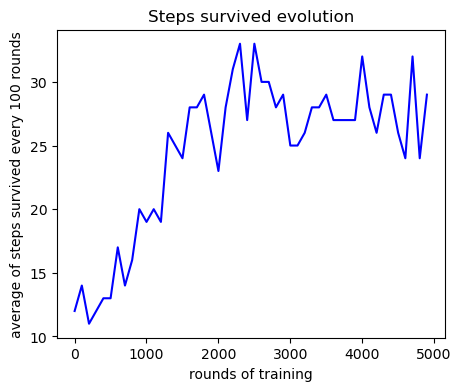

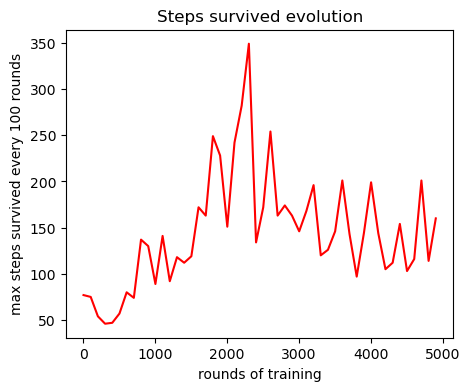

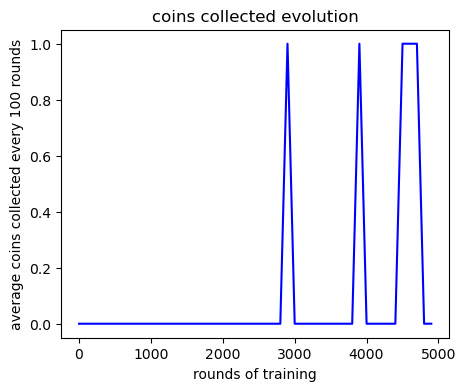

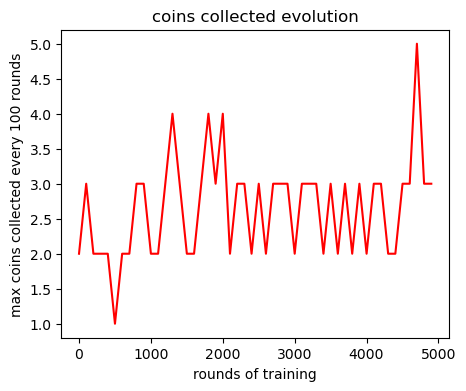

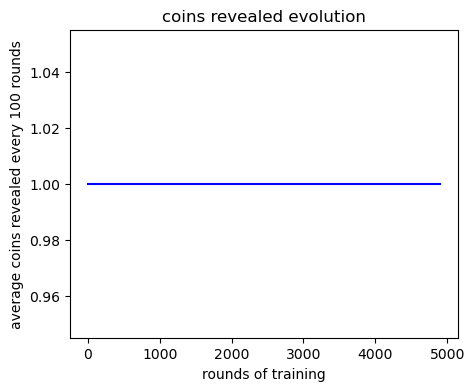

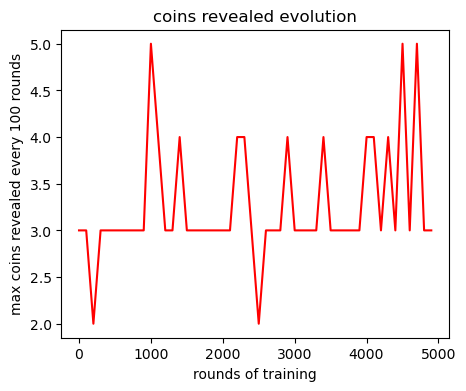

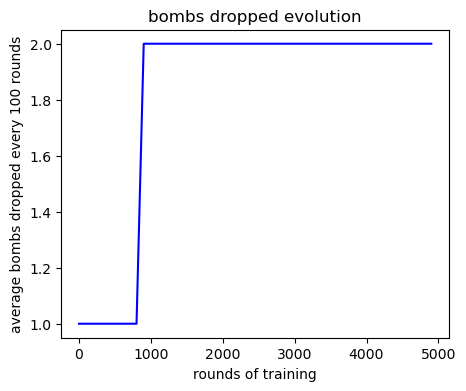

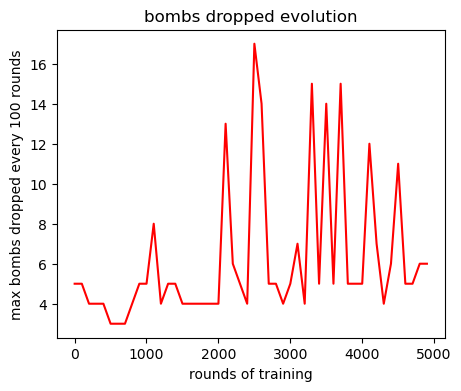

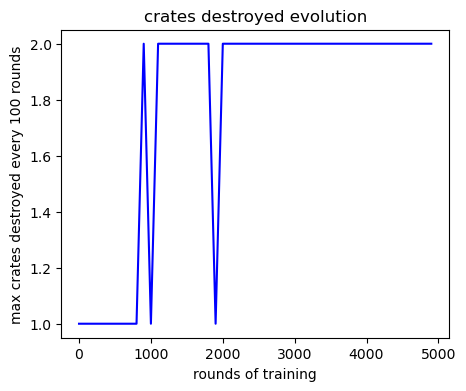

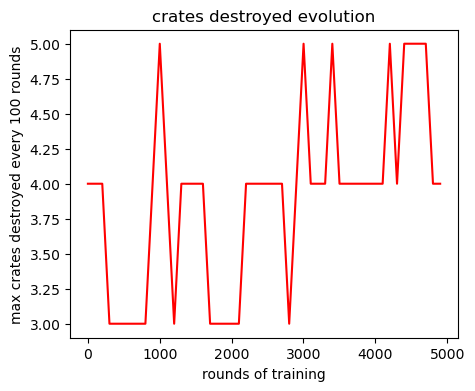

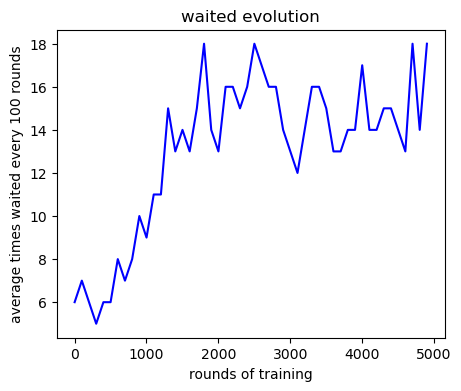

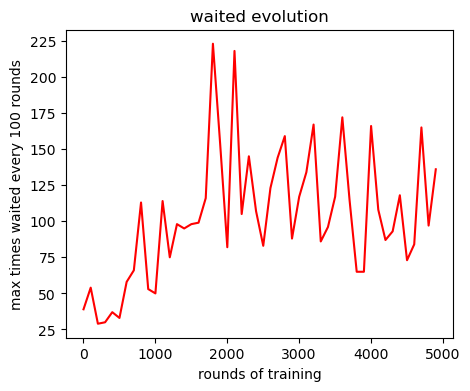

In [122]:
import numpy as np 
import matplotlib.pyplot as plt 
 
# data to be plotted
x = list(range(1, 5001, 100))
y1=s1
y2=sm1
y3=c1
y4=cm1
y5=cr1
y6=crm1
y7=b1
y8=bm1
y9=ca1
y10=cam1
y11=w1
y12=wm1
 
# steps survived 
plt.figure(figsize=(5, 4))
plt.title("Steps survived evolution") 
plt.xlabel("rounds of training") 
plt.ylabel("average of steps survived every 100 rounds") 
plt.plot(x, y1, color ="blue") 
plt.show()

plt.figure(figsize=(5, 4))
plt.title("Steps survived evolution") 
plt.xlabel("rounds of training") 
plt.ylabel("max steps survived every 100 rounds") 
plt.plot(x, y2, color="red")
plt.show()

#coins collected
plt.figure(figsize=(5, 4))
plt.title("coins collected evolution") 
plt.xlabel("rounds of training") 
plt.ylabel("average coins collected every 100 rounds") 
plt.plot(x, y3, color="blue")
plt.show()

plt.figure(figsize=(5, 4))
plt.title("coins collected evolution") 
plt.xlabel("rounds of training") 
plt.ylabel("max coins collected every 100 rounds") 
plt.plot(x, y4, color="red")
plt.show()

#coins revealed
plt.figure(figsize=(5, 4))
plt.title("coins revealed evolution") 
plt.xlabel("rounds of training") 
plt.ylabel("average coins revealed every 100 rounds") 
plt.plot(x, y5, color="blue")
plt.show()

plt.figure(figsize=(5, 4))
plt.title("coins revealed evolution") 
plt.xlabel("rounds of training") 
plt.ylabel("max coins revealed every 100 rounds") 
plt.plot(x, y6, color="red")
plt.show()

#bombs
plt.figure(figsize=(5, 4))
plt.title("bombs dropped evolution") 
plt.xlabel("rounds of training") 
plt.ylabel("average bombs dropped every 100 rounds") 
plt.plot(x, y7, color="blue")
plt.show()

plt.figure(figsize=(5, 4))
plt.title("bombs dropped evolution") 
plt.xlabel("rounds of training") 
plt.ylabel("max bombs dropped every 100 rounds") 
plt.plot(x, y8, color="red")
plt.show()

#crates
plt.figure(figsize=(5, 4))
plt.title("crates destroyed evolution") 
plt.xlabel("rounds of training") 
plt.ylabel("max crates destroyed every 100 rounds") 
plt.plot(x, y9, color="blue")
plt.show()

plt.figure(figsize=(5, 4))
plt.title("crates destroyed evolution") 
plt.xlabel("rounds of training") 
plt.ylabel("max crates destroyed every 100 rounds") 
plt.plot(x, y10, color="red")
plt.show()

#waited
plt.figure(figsize=(5, 4))
plt.title("waited evolution") 
plt.xlabel("rounds of training") 
plt.ylabel("average times waited every 100 rounds") 
plt.plot(x, y11, color="blue")
plt.show()

plt.figure(figsize=(5, 4))
plt.title("waited evolution") 
plt.xlabel("rounds of training") 
plt.ylabel("max times waited every 100 rounds") 
plt.plot(x, y12, color="red")
plt.show()

In [77]:
#steps
y1=[8, 5, 14, 9, 6, 8, 7, 6, 33, 5, 25, 11, 5, 6, 12, 16, 7, 9, 5, 23, 13, 5, 13, 6, 6, 5, 5, 5, 18, 21, 7, 23, 16, 8, 11, 8, 5, 77, 9, 10, 8, 12, 13, 8, 6, 15, 9, 6, 5, 27, 16, 55, 6, 6, 11, 6, 5, 8, 10, 13, 38, 6, 5, 14, 5, 5, 7, 10, 36, 30, 27, 5, 10, 12, 15, 15, 17, 5, 7, 6, 5, 6, 31, 13, 17, 6, 10, 5, 7, 19, 5, 11, 8, 15, 13, 6, 13, 6, 5, 19, 17, 5, 8, 51, 5, 5, 75, 10, 11, 27, 7, 15, 7, 18, 22, 9, 19, 5, 37, 5, 8, 12, 5, 5, 6, 9, 28, 6, 5, 7, 12, 10, 10, 8, 27, 6, 7, 10, 5, 7, 7, 10, 13, 10, 8, 5, 6, 6, 22, 18, 9, 6, 43, 9, 5, 6, 5, 12, 56, 6, 5, 7, 6, 11, 21, 5, 15, 6, 8, 12, 30, 7, 13, 16, 12, 6, 7, 13, 8, 6, 6, 8, 8, 43, 5, 23, 23, 7, 7, 18, 7, 33, 8, 13, 52, 58, 5, 11, 15, 41, 20, 16, 7, 7, 8, 8, 13, 5, 11, 6, 5, 8, 7, 14, 32, 6, 8, 14, 6, 6, 7, 54, 9, 9, 6, 14, 6, 5, 25, 18, 5, 5, 6, 8, 5, 5, 16, 6, 7, 24, 14, 21, 14, 6, 9, 5, 6, 5, 5, 6, 7, 21, 7, 13, 13, 7, 6, 6, 12, 7, 17, 7, 35, 15, 5, 10, 7, 6, 6, 12, 8, 8, 7, 8, 13, 7, 5, 14, 11, 10, 18, 15, 8, 5, 17, 7, 5, 9, 13, 20, 20, 9, 7, 6, 34, 6, 15, 21, 51, 13, 16, 31, 6, 7, 6, 27, 5, 7, 5, 21, 17, 6, 6, 5, 13, 5, 20, 11, 11, 10, 7, 26, 6, 5, 5, 5, 14, 5, 7, 7, 15, 7, 26, 8, 6, 6, 7, 12, 7, 20, 6, 7, 6, 9, 8, 5, 14, 23, 11, 46, 36, 32, 7, 6, 13, 7, 8, 7, 18, 6, 8, 14, 31, 7, 13, 18, 11, 6, 25, 13, 39, 5, 5, 14, 9, 6, 6, 7, 6, 6, 8, 11, 7, 7, 6, 13, 6, 17, 15, 7, 7, 5, 19, 27, 8, 6, 6, 17, 17, 16, 15, 5, 8, 6, 14, 14, 9, 46, 7, 6, 8, 13, 7, 5, 13, 16, 12, 13, 33, 24, 10, 33, 5, 7, 5, 47, 27, 7, 7, 15, 6, 7, 16, 37, 7, 6, 6, 33, 9, 14, 6, 7, 22, 13, 6, 22, 10, 22, 7, 13, 15, 6, 6, 17, 33, 6, 17, 7, 31, 13, 6, 6, 15, 43, 6, 22, 8, 5, 5, 8, 5, 7, 13, 6, 9, 18, 6, 15, 6, 7, 14, 17, 6, 13, 15, 6, 24, 14, 6, 23, 8, 6, 6, 13, 5, 6, 7, 11, 8, 25, 7, 7, 19, 6, 5, 13, 39, 7, 9, 9, 10, 5, 8, 12, 13, 6, 5, 15, 6, 6, 9, 7, 34, 5, 19, 29, 5, 12, 5, 6, 8, 15, 5, 7, 7, 27, 17, 15, 8, 9, 6, 6, 7, 6, 18, 7, 6, 7, 35, 5, 29, 6, 21, 8, 5, 20, 6, 7, 30, 26, 7, 25, 5, 14, 6, 13, 31, 6, 5, 15, 13, 5, 11, 57, 7, 6, 29, 13, 10, 10, 14, 13, 6, 5, 6, 44, 9, 15, 14, 6, 28, 48, 7, 13, 36, 15, 7, 5, 19, 6, 5, 6, 7, 9, 13, 7, 6, 7, 5, 12, 8, 31, 7, 29, 18, 34, 5, 6, 18, 7, 16, 15, 15, 46, 23, 5, 38, 5, 26, 15, 6, 20, 6, 43, 22, 20, 11, 62, 17, 11, 5, 27, 51, 41, 28, 17, 16, 6, 12, 13, 21, 13, 5, 7, 23, 7, 7, 21, 10, 21, 8, 18, 13, 7, 7, 29, 13, 16, 9, 9, 79, 13, 80, 9, 24, 7, 6, 7, 7, 5, 13, 16, 13, 13, 25, 13, 15, 48, 10, 6, 32, 14, 26, 7, 20, 6, 25, 31, 7, 7, 27, 5, 6, 6, 38, 14, 7, 20, 7, 6, 6, 5, 6, 17, 6, 10, 19, 10, 7, 14, 7, 35, 13, 6, 8, 7, 5, 10, 6, 6, 16, 22, 29, 6, 13, 13, 21, 6, 6, 26, 7, 5, 8, 10, 5, 8, 20, 7, 13, 13, 24, 22, 34, 6, 19, 14, 18, 8, 13, 23, 7, 18, 7, 15, 7, 5, 7, 13, 15, 7, 7, 13, 37, 24, 16, 58, 30, 6, 7, 12, 7, 23, 17, 5, 11, 23, 8, 40, 5, 14, 74, 7, 6, 7, 13, 28, 14, 7, 5, 16, 21, 13, 9, 26, 31, 36, 15, 5, 7, 5, 9, 11, 6, 6, 17, 5, 32, 19, 5, 6, 18, 19, 7, 7, 7, 6, 5, 6, 5, 11, 6, 7, 6, 23, 6, 5, 14, 8, 6, 7, 7, 14, 5, 10, 43, 27, 30, 6, 25, 32, 27, 13, 6, 14, 5, 13, 18, 7, 8, 39, 6, 6, 12, 48, 7, 20, 53, 6, 21, 47, 6, 24, 34, 8, 35, 8, 15, 6, 16, 7, 7, 15, 7, 7, 6, 7, 7, 7, 14, 137, 13, 16, 17, 7, 27, 5, 7, 9, 36, 7, 6, 20, 5, 47, 7, 7, 7, 7, 6, 6, 5, 7, 9, 10, 33, 13, 6, 7, 18, 18, 7, 13, 8, 33, 26, 7, 6, 82, 6, 6, 7, 13, 60, 6, 35, 53, 8, 7, 130, 13, 15, 48, 7, 20, 5, 13, 17, 13, 14, 34, 53, 7, 37, 13, 106, 18, 13, 31, 7, 64, 9, 28, 14, 10, 13, 13, 7, 14, 14, 52, 57, 39, 6, 11, 5, 14, 7, 26, 7, 49, 9, 31, 5, 8, 10, 32, 5, 6, 18, 5, 13, 12, 17, 37, 6, 6, 14, 7, 13, 37, 7, 7, 61, 48, 13, 26, 14, 6, 30, 56, 35, 14, 46, 7, 31, 13, 6, 19, 46, 7, 53, 40, 29, 6, 20, 24, 44, 6, 22, 6, 7, 7, 13, 6, 7, 26, 5, 21, 6, 5, 5, 37, 8, 6, 14, 50, 17, 89, 46, 6, 36, 17, 13, 6, 8, 14, 7, 6, 13, 11, 7, 24, 13, 11, 8, 13, 6, 7, 6, 13, 8, 25, 5, 13, 45, 26, 14, 7, 7, 37, 14, 7, 19, 6, 11, 6, 6, 42, 52, 14, 7, 31, 6, 28, 23, 14, 7, 7, 6, 18, 44, 6, 13, 37, 49, 5, 11, 7, 48, 6, 5, 7, 5, 7, 16, 13, 15, 6, 53, 17, 5, 7, 13, 18, 5, 31, 134, 24, 15, 7, 7, 7, 13, 45, 13, 6, 7, 36, 33, 7, 7, 30, 7, 7, 13, 36, 44, 15, 23, 16, 14, 7, 6, 141, 13, 17, 13, 13, 10, 16, 6, 5, 49, 13, 13, 29, 6, 10, 13, 10, 7, 7, 14, 7, 5, 7, 5, 13, 29, 16, 5, 6, 6, 8, 75, 19, 6, 13, 106, 20, 77, 7, 7, 5, 33, 22, 31, 5, 21, 8, 6, 49, 29, 6, 6, 10, 6, 23, 22, 6, 13, 87, 23, 32, 7, 6, 11, 40, 13, 13, 13, 7, 15, 16, 44, 13, 33, 6, 7, 7, 92, 14, 6, 14, 8, 15, 6, 16, 7, 53, 5, 76, 13, 70, 6, 14, 14, 35, 7, 49, 7, 32, 5, 8, 14, 7, 21, 6, 13, 13, 6, 15, 40, 13, 13, 13, 21, 7, 88, 10, 7, 31, 13, 34, 33, 9, 13, 9, 13, 6, 21, 15, 23, 19, 13, 5, 5, 20, 7, 7, 7, 13, 65, 41, 6, 11, 5, 5, 13, 6, 14, 7, 74, 18, 13, 15, 37, 16, 7, 70, 108, 7, 7, 11, 78, 117, 8, 19, 13, 118, 100, 13, 6, 66, 17, 54, 8, 21, 6, 41, 32, 13, 7, 26, 62, 6, 29, 28, 7, 14, 27, 30, 6, 13, 33, 16, 13, 60, 18, 6, 9, 18, 13, 5, 16, 31, 7, 14, 5, 14, 76, 115, 42, 31, 13, 7, 14, 7, 30, 27, 7, 14, 15, 18, 34, 13, 14, 8, 14, 15, 69, 24, 26, 25, 5, 5, 7, 5, 8, 53, 14, 34, 9, 43, 20, 26, 45, 28, 7, 14, 56, 14, 34, 13, 7, 7, 14, 20, 21, 14, 5, 7, 14, 17, 48, 7, 13, 58, 7, 25, 13, 13, 91, 27, 13, 16, 21, 32, 13, 5, 46, 38, 7, 7, 53, 31, 18, 51, 14, 6, 112, 55, 7, 6, 6, 14, 5, 7, 99, 6, 22, 13, 39, 92, 7, 34, 16, 14, 6, 15, 37, 24, 5, 55, 13, 9, 14, 7, 17, 7, 6, 13, 61, 28, 21, 20, 80, 14, 7, 14, 17, 40, 18, 13, 13, 23, 12, 8, 14, 7, 7, 13, 90, 14, 58, 14, 109, 13, 16, 23, 14, 9, 16, 22, 6, 56, 119, 8, 105, 5, 32, 15, 15, 6, 5, 18, 7, 5, 13, 7, 17, 108, 15, 6, 6, 6, 82, 5, 69, 6, 6, 34, 19, 48, 14, 6, 6, 13, 33, 19, 67, 14, 52, 30, 7, 13, 18, 13, 15, 20, 6, 7, 15, 13, 31, 36, 28, 36, 7, 46, 9, 24, 7, 7, 25, 29, 13, 7, 17, 14, 44, 41, 6, 14, 97, 6, 15, 6, 7, 34, 44, 6, 83, 15, 44, 6, 17, 25, 14, 13, 60, 22, 6, 13, 6, 60, 13, 13, 23, 13, 14, 13, 13, 31, 37, 7, 7, 15, 18, 7, 24, 43, 13, 57, 7, 47, 50, 14, 13, 69, 8, 17, 101, 15, 14, 16, 85, 34, 13, 66, 7, 22, 26, 26, 6, 7, 115, 46, 7, 55, 30, 7, 29, 18, 53, 98, 6, 13, 5, 15, 6, 7, 8, 5, 7, 13, 14, 23, 29, 6, 5, 15, 22, 13, 7, 13, 27, 92, 24, 5, 17, 72, 14, 41, 41, 37, 29, 48, 21, 57, 45, 18, 13, 23, 14, 55, 6, 8, 39, 14, 18, 172, 17, 15, 5, 41, 21, 46, 13, 7, 66, 13, 6, 15, 19, 13, 56, 8, 7, 110, 5, 13, 26, 39, 14, 20, 21, 52, 19, 11, 7, 69, 15, 14, 26, 6, 24, 15, 30, 6, 14, 25, 7, 7, 14, 13, 7, 96, 5, 16, 14, 32, 13, 15, 5, 26, 5, 44, 5, 23, 14, 17, 19, 7, 34, 7, 13, 5, 5, 75, 42, 67, 44, 17, 136, 61, 67, 30, 13, 44, 17, 27, 42, 42, 7, 141, 31, 14, 6, 14, 39, 13, 6, 16, 5, 42, 71, 7, 14, 163, 124, 13, 12, 13, 6, 36, 23, 6, 15, 7, 26, 124, 5, 7, 7, 98, 7, 6, 14, 23, 60, 14, 7, 32, 30, 15, 18, 13, 13, 13, 7, 10, 23, 20, 85, 48, 70, 48, 7, 13, 13, 16, 5, 6, 19, 76, 8, 58, 14, 13, 25, 7, 249, 15, 28, 21, 10, 89, 35, 7, 62, 5, 14, 24, 6, 13, 21, 7, 87, 7, 7, 14, 44, 86, 15, 15, 25, 6, 148, 5, 6, 57, 6, 57, 16, 20, 6, 13, 14, 6, 41, 17, 14, 15, 46, 7, 13, 40, 30, 5, 96, 13, 7, 18, 25, 17, 13, 7, 30, 37, 126, 19, 21, 6, 7, 5, 6, 13, 9, 29, 26, 24, 13, 13, 106, 13, 7, 13, 6, 13, 45, 7, 46, 9, 14, 30, 14, 7, 7, 6, 13, 14, 13, 14, 20, 13, 7, 7, 15, 13, 6, 7, 5, 15, 6, 7, 7, 6, 145, 170, 14, 43, 54, 13, 6, 20, 8, 13, 6, 18, 6, 39, 50, 6, 11, 75, 10, 7, 16, 15, 43, 23, 7, 62, 69, 13, 14, 228, 55, 16, 19, 64, 10, 67, 6, 5, 14, 7, 14, 24, 6, 25, 170, 7, 7, 7, 8, 7, 13, 20, 18, 7, 16, 7, 17, 5, 6, 17, 5, 15, 7, 13, 23, 14, 14, 13, 13, 38, 7, 13, 7, 151, 7, 7, 16, 52, 93, 15, 45, 13, 24, 88, 39, 6, 45, 14, 40, 20, 21, 11, 13, 44, 24, 13, 7, 6, 81, 14, 26, 7, 58, 6, 20, 63, 14, 6, 6, 7, 13, 13, 21, 42, 37, 31, 15, 49, 7, 13, 9, 30, 13, 13, 6, 7, 59, 86, 5, 47, 10, 7, 6, 42, 17, 21, 6, 6, 38, 7, 7, 6, 15, 15, 10, 128, 6, 16, 14, 6, 35, 13, 7, 7, 42, 43, 30, 5, 13, 13, 39, 6, 30, 7, 71, 31, 78, 13, 23, 40, 14, 58, 7, 5, 80, 6, 22, 5, 20, 6, 6, 20, 49, 6, 11, 7, 8, 7, 7, 6, 6, 13, 39, 57, 78, 11, 5, 6, 47, 13, 7, 28, 48, 5, 33, 34, 75, 20, 13, 13, 7, 6, 13, 45, 5, 13, 7, 13, 77, 5, 13, 14, 159, 17, 6, 7, 14, 13, 90, 7, 5, 7, 242, 21, 139, 5, 7, 8, 6, 7, 58, 14, 36, 15, 6, 20, 33, 36, 13, 84, 32, 36, 44, 35, 6, 59, 7, 7, 11, 42, 43, 20, 6, 7, 9, 110, 13, 48, 21, 28, 14, 14, 25, 33, 48, 13, 13, 7, 13, 16, 10, 145, 87, 10, 6, 22, 18, 14, 5, 9, 15, 17, 14, 63, 5, 5, 282, 17, 50, 37, 22, 28, 7, 30, 72, 14, 6, 113, 42, 37, 31, 7, 76, 17, 43, 15, 16, 6, 16, 6, 96, 7, 12, 14, 31, 14, 13, 27, 13, 65, 100, 6, 51, 14, 78, 15, 11, 13, 16, 5, 7, 5, 7, 16, 60, 14, 110, 63, 21, 21, 13, 14, 5, 13, 54, 21, 14, 31, 7, 40, 6, 6, 26, 7, 20, 64, 170, 38, 13, 349, 15, 24, 171, 37, 134, 14, 8, 32, 40, 31, 30, 34, 13, 7, 7, 10, 21, 50, 5, 6, 57, 129, 38, 20, 52, 20, 7, 13, 7, 5, 42, 14, 24, 8, 13, 84, 20, 13, 80, 7, 17, 13, 6, 6, 15, 7, 13, 7, 57, 15, 28, 54, 17, 8, 6, 31, 20, 7, 23, 76, 13, 6, 19, 25, 36, 133, 30, 89, 13, 33, 36, 5, 22, 7, 64, 23, 37, 13, 22, 6, 28, 20, 36, 33, 25, 90, 13, 7, 13, 14, 6, 58, 91, 27, 33, 47, 6, 63, 55, 14, 8, 31, 134, 28, 7, 18, 7, 15, 14, 43, 18, 7, 7, 110, 62, 7, 16, 14, 15, 34, 14, 31, 5, 15, 30, 7, 7, 85, 14, 52, 16, 8, 39, 21, 11, 29, 15, 38, 30, 7, 13, 94, 7, 14, 7, 20, 7, 21, 14, 6, 14, 6, 21, 7, 80, 109, 29, 5, 5, 24, 7, 17, 15, 60, 64, 14, 7, 13, 6, 13, 13, 59, 9, 22, 5, 13, 20, 70, 13, 7, 7, 7, 13, 120, 14, 75, 7, 66, 13, 13, 10, 7, 36, 45, 102, 13, 16, 13, 170, 6, 54, 6, 81, 7, 32, 29, 38, 74, 7, 14, 13, 14, 43, 54, 40, 6, 7, 38, 16, 73, 62, 13, 16, 44, 88, 50, 9, 7, 88, 15, 36, 32, 42, 8, 20, 51, 6, 13, 52, 20, 7, 60, 13, 7, 34, 45, 32, 55, 17, 13, 56, 31, 13, 5, 5, 8, 13, 30, 5, 172, 24, 14, 13, 19, 13, 86, 21, 6, 34, 7, 32, 13, 6, 22, 7, 29, 55, 20, 23, 56, 65, 20, 22, 96, 28, 57, 254, 15, 25, 6, 48, 13, 14, 5, 67, 18, 13, 7, 13, 6, 108, 18, 13, 20, 20, 15, 15, 128, 16, 23, 9, 13, 13, 15, 13, 5, 11, 16, 7, 15, 41, 96, 13, 5, 21, 58, 99, 7, 31, 13, 23, 7, 41, 90, 13, 5, 7, 40, 20, 17, 14, 20, 86, 43, 130, 49, 6, 12, 7, 13, 22, 14, 7, 7, 13, 20, 13, 7, 13, 81, 6, 9, 28, 7, 36, 7, 20, 24, 16, 81, 13, 13, 6, 20, 21, 14, 19, 13, 14, 25, 97, 51, 8, 13, 6, 46, 46, 14, 149, 6, 14, 38, 21, 19, 44, 51, 6, 162, 6, 75, 7, 7, 15, 163, 29, 49, 49, 33, 7, 41, 17, 114, 11, 21, 13, 36, 7, 22, 24, 13, 16, 23, 7, 39, 27, 6, 13, 21, 46, 39, 14, 5, 30, 13, 13, 14, 86, 31, 27, 22, 25, 23, 14, 13, 48, 81, 80, 20, 53, 52, 14, 13, 70, 6, 19, 58, 51, 22, 39, 26, 22, 30, 9, 7, 7, 13, 14, 13, 23, 28, 23, 6, 5, 5, 14, 67, 35, 6, 6, 31, 13, 14, 57, 69, 102, 5, 16, 29, 7, 20, 16, 21, 13, 45, 48, 13, 13, 6, 5, 23, 5, 29, 61, 14, 13, 21, 37, 7, 7, 56, 37, 13, 14, 5, 7, 7, 16, 7, 38, 43, 13, 7, 21, 13, 5, 15, 17, 68, 13, 174, 117, 46, 20, 8, 7, 13, 59, 7, 15, 57, 7, 41, 6, 19, 19, 13, 7, 35, 7, 7, 14, 9, 21, 7, 48, 17, 48, 116, 6, 33, 13, 81, 40, 18, 6, 53, 19, 16, 53, 31, 82, 24, 13, 51, 14, 32, 15, 29, 36, 29, 13, 38, 45, 14, 95, 6, 16, 14, 27, 7, 38, 39, 33, 22, 77, 7, 7, 7, 27, 15, 52, 36, 13, 34, 7, 6, 26, 25, 17, 14, 7, 56, 15, 5, 96, 115, 16, 75, 16, 18, 7, 7, 15, 14, 6, 99, 48, 13, 7, 26, 22, 60, 14, 15, 13, 35, 13, 26, 5, 61, 14, 13, 52, 64, 88, 14, 23, 20, 13, 39, 13, 20, 13, 120, 7, 41, 7, 47, 37, 67, 34, 6, 9, 163, 14, 16, 14, 13, 7, 13, 14, 16, 46, 37, 7, 14, 5, 14, 7, 13, 7, 46, 13, 13, 7, 14, 40, 17, 58, 5, 37, 63, 33, 39, 21, 24, 15, 5, 42, 83, 14, 36, 16, 13, 15, 22, 20, 6, 9, 6, 63, 53, 14, 15, 13, 53, 31, 7, 29, 14, 119, 41, 7, 71, 5, 27, 14, 14, 7, 17, 13, 15, 14, 13, 5, 9, 22, 16, 6, 13, 6, 109, 7, 16, 19, 8, 13, 35, 23, 33, 23, 7, 8, 20, 24, 13, 6, 7, 5, 23, 30, 25, 5, 30, 14, 74, 38, 20, 20, 36, 146, 14, 13, 8, 91, 13, 20, 56, 5, 14, 12, 13, 8, 26, 14, 25, 6, 52, 7, 13, 14, 52, 21, 52, 7, 87, 23, 7, 5, 23, 14, 14, 22, 22, 13, 68, 13, 7, 13, 7, 13, 6, 7, 15, 41, 7, 30, 49, 6, 106, 5, 52, 6, 115, 5, 15, 29, 7, 14, 42, 69, 22, 7, 15, 7, 60, 13, 14, 70, 6, 6, 15, 14, 168, 7, 10, 21, 17, 6, 33, 13, 16, 6, 15, 13, 14, 20, 15, 34, 6, 9, 30, 13, 8, 79, 16, 48, 42, 14, 55, 21, 68, 7, 15, 23, 13, 7, 49, 28, 15, 7, 20, 15, 15, 37, 16, 7, 45, 7, 7, 14, 21, 14, 5, 13, 74, 77, 29, 65, 44, 16, 20, 5, 27, 13, 13, 7, 5, 8, 7, 7, 25, 5, 14, 5, 46, 7, 31, 14, 6, 5, 44, 37, 88, 7, 14, 33, 15, 7, 7, 7, 26, 13, 13, 9, 21, 196, 37, 16, 14, 5, 14, 76, 7, 5, 12, 14, 14, 16, 13, 5, 13, 13, 30, 7, 164, 14, 17, 20, 52, 11, 13, 27, 41, 60, 144, 8, 7, 7, 144, 13, 37, 7, 44, 14, 5, 26, 7, 27, 14, 18, 52, 37, 14, 7, 35, 14, 13, 52, 13, 41, 83, 6, 13, 13, 14, 7, 87, 16, 6, 13, 40, 17, 5, 14, 24, 118, 13, 48, 25, 30, 13, 26, 14, 8, 5, 7, 5, 13, 47, 13, 95, 6, 13, 7, 27, 106, 19, 13, 37, 5, 66, 13, 17, 6, 120, 67, 16, 6, 7, 7, 8, 109, 13, 14, 79, 34, 33, 82, 14, 67, 14, 13, 34, 6, 7, 14, 25, 31, 12, 13, 13, 49, 16, 6, 7, 5, 26, 14, 16, 7, 26, 64, 9, 13, 13, 27, 110, 83, 70, 17, 13, 17, 15, 14, 91, 9, 5, 7, 20, 13, 53, 15, 17, 19, 34, 34, 27, 92, 39, 64, 13, 78, 14, 17, 91, 18, 7, 40, 22, 13, 70, 23, 5, 76, 7, 7, 52, 21, 6, 16, 16, 60, 25, 17, 55, 7, 25, 54, 15, 70, 38, 126, 7, 5, 5, 45, 28, 13, 6, 42, 13, 14, 5, 14, 22, 6, 18, 5, 14, 9, 22, 13, 5, 14, 6, 111, 17, 6, 7, 13, 48, 12, 5, 60, 76, 18, 23, 44, 7, 5, 20, 18, 14, 75, 96, 7, 20, 25, 13, 21, 20, 64, 24, 46, 21, 46, 7, 52, 84, 20, 27, 118, 14, 6, 7, 22, 13, 25, 46, 14, 32, 6, 8, 13, 13, 26, 129, 16, 8, 6, 13, 5, 32, 7, 5, 35, 20, 20, 14, 36, 6, 72, 6, 13, 48, 31, 32, 81, 6, 5, 13, 31, 17, 6, 16, 146, 48, 7, 14, 27, 14, 25, 5, 36, 23, 7, 6, 5, 18, 32, 123, 127, 20, 13, 16, 13, 13, 36, 14, 64, 5, 26, 5, 5, 93, 18, 37, 7, 15, 13, 7, 110, 6, 135, 13, 5, 9, 5, 53, 27, 5, 9, 13, 117, 15, 9, 31, 22, 24, 7, 7, 8, 7, 8, 9, 116, 28, 13, 15, 14, 5, 6, 43, 18, 47, 6, 36, 87, 31, 14, 63, 13, 12, 141, 22, 15, 7, 36, 8, 14, 7, 28, 7, 13, 201, 15, 40, 57, 6, 7, 6, 18, 25, 50, 14, 29, 6, 25, 6, 21, 14, 36, 15, 65, 45, 5, 25, 5, 6, 20, 18, 5, 39, 14, 107, 14, 22, 13, 13, 15, 20, 14, 6, 30, 7, 5, 13, 13, 14, 6, 35, 7, 14, 14, 6, 20, 43, 22, 63, 14, 141, 30, 14, 119, 21, 24, 37, 36, 14, 6, 6, 23, 5, 40, 21, 7, 13, 23, 20, 13, 6, 95, 61, 34, 14, 40, 20, 8, 13, 13, 29, 29, 36, 16, 7, 73, 6, 5, 45, 13, 14, 22, 52, 15, 23, 126, 22, 7, 7, 26, 143, 33, 24, 68, 14, 35, 13, 15, 15, 5, 6, 29, 17, 22, 23, 38, 31, 7, 30, 14, 5, 27, 20, 33, 29, 26, 5, 6, 28, 63, 13, 14, 14, 88, 7, 33, 13, 13, 15, 9, 16, 39, 6, 60, 8, 14, 14, 86, 16, 31, 16, 52, 9, 52, 13, 7, 10, 24, 13, 6, 24, 90, 7, 6, 13, 53, 52, 10, 14, 15, 6, 74, 13, 5, 20, 30, 79, 16, 27, 14, 76, 14, 34, 46, 31, 20, 6, 15, 21, 15, 34, 7, 7, 14, 5, 13, 36, 34, 61, 63, 6, 82, 62, 14, 32, 7, 21, 12, 13, 15, 30, 5, 28, 28, 16, 45, 37, 13, 50, 30, 33, 43, 50, 7, 5, 13, 82, 14, 97, 6, 45, 17, 17, 20, 6, 42, 66, 17, 9, 13, 37, 13, 5, 23, 7, 14, 23, 21, 35, 14, 47, 7, 6, 8, 23, 22, 16, 7, 14, 40, 19, 16, 13, 51, 7, 73, 14, 26, 63, 14, 15, 144, 20, 8, 14, 62, 27, 13, 22, 5, 13, 54, 5, 15, 75, 15, 7, 29, 6, 28, 14, 14, 34, 14, 38, 13, 27, 49, 59, 29, 27, 16, 5, 7, 38, 60, 23, 28, 15, 21, 22, 47, 15, 64, 15, 48, 22, 40, 44, 27, 20, 6, 15, 5, 9, 13, 48, 20, 13, 25, 45, 32, 13, 44, 13, 15, 23, 32, 15, 33, 21, 5, 45, 14, 21, 17, 63, 42, 58, 27, 16, 79, 13, 16, 6, 6, 33, 118, 14, 32, 41, 13, 7, 24, 14, 106, 7, 42, 199, 46, 38, 7, 59, 7, 21, 6, 16, 36, 13, 15, 15, 89, 5, 11, 14, 41, 54, 8, 13, 15, 7, 61, 14, 41, 15, 9, 13, 15, 74, 32, 15, 8, 18, 14, 22, 13, 24, 46, 68, 6, 13, 5, 13, 37, 6, 124, 34, 7, 32, 42, 15, 28, 14, 19, 93, 6, 22, 111, 84, 48, 14, 72, 15, 7, 15, 142, 21, 8, 79, 28, 13, 46, 7, 6, 20, 32, 17, 13, 13, 13, 13, 36, 20, 24, 15, 5, 42, 28, 79, 6, 49, 85, 22, 14, 50, 13, 6, 6, 13, 30, 14, 15, 21, 27, 22, 18, 70, 6, 57, 104, 100, 51, 5, 12, 7, 20, 14, 30, 32, 15, 78, 144, 13, 8, 28, 51, 5, 7, 6, 27, 13, 32, 37, 21, 21, 16, 13, 47, 6, 13, 35, 14, 19, 14, 65, 15, 14, 14, 29, 7, 32, 15, 13, 26, 6, 21, 21, 14, 14, 15, 28, 132, 33, 14, 95, 5, 15, 12, 54, 16, 14, 23, 13, 37, 10, 73, 5, 7, 30, 6, 20, 16, 6, 16, 38, 5, 13, 14, 12, 37, 22, 6, 7, 7, 54, 52, 31, 42, 69, 52, 33, 70, 20, 14, 8, 6, 26, 22, 52, 14, 6, 6, 62, 15, 105, 30, 29, 7, 6, 13, 6, 70, 5, 83, 98, 14, 7, 14, 56, 6, 20, 46, 13, 13, 6, 62, 27, 68, 30, 14, 7, 6, 13, 48, 5, 7, 26, 8, 9, 23, 14, 36, 50, 13, 104, 15, 15, 6, 31, 35, 24, 13, 5, 27, 15, 6, 14, 22, 24, 14, 23, 14, 15, 27, 18, 20, 13, 14, 53, 18, 35, 14, 59, 13, 7, 20, 15, 15, 40, 6, 51, 42, 24, 20, 112, 7, 7, 45, 13, 13, 8, 85, 14, 73, 13, 13, 21, 24, 14, 5, 13, 26, 32, 43, 23, 13, 5, 20, 21, 6, 85, 13, 13, 24, 29, 7, 26, 33, 13, 6, 61, 20, 13, 52, 9, 59, 22, 19, 17, 14, 47, 15, 14, 13, 22, 17, 14, 64, 39, 94, 14, 33, 28, 60, 7, 81, 26, 111, 13, 72, 14, 39, 13, 25, 28, 29, 14, 34, 6, 28, 15, 22, 39, 51, 6, 46, 26, 66, 20, 14, 13, 6, 68, 18, 7, 7, 14, 19, 53, 71, 13, 14, 6, 16, 47, 22, 14, 19, 118, 14, 26, 28, 7, 15, 153, 7, 23, 14, 113, 13, 13, 53, 13, 91, 43, 5, 5, 7, 28, 25, 13, 19, 15, 73, 5, 76, 48, 22, 7, 15, 7, 14, 99, 37, 14, 13, 106, 28, 17, 13, 26, 31, 15, 14, 30, 18, 14, 13, 61, 5, 6, 13, 20, 65, 14, 21, 32, 14, 24, 22, 37, 26, 22, 13, 154, 22, 7, 40, 8, 15, 60, 20, 7, 7, 32, 15, 33, 14, 20, 53, 14, 7, 12, 6, 19, 86, 14, 47, 5, 71, 7, 16, 99, 56, 31, 24, 22, 13, 14, 31, 14, 14, 22, 13, 16, 69, 42, 13, 6, 13, 13, 26, 22, 7, 22, 6, 14, 25, 13, 20, 48, 36, 14, 13, 8, 57, 15, 13, 6, 27, 92, 7, 26, 5, 14, 34, 30, 6, 16, 7, 43, 14, 28, 13, 7, 17, 37, 5, 17, 13, 14, 6, 5, 36, 66, 6, 61, 14, 6, 77, 25, 103, 16, 37, 7, 35, 7, 85, 35, 18, 42, 34, 41, 27, 15, 13, 7, 5, 23, 22, 91, 13, 36, 13, 47, 14, 13, 23, 23, 13, 23, 20, 13, 14, 41, 32, 13, 39, 8, 14, 12, 45, 14, 20, 7, 28, 14, 7, 14, 98, 14, 7, 15, 69, 9, 29, 43, 6, 5, 14, 14, 14, 52, 6, 13, 13, 97, 13, 30, 14, 65, 18, 5, 14, 26, 5, 13, 6, 15, 13, 6, 6, 16, 13, 89, 13, 17, 13, 14, 7, 5, 14, 34, 72, 38, 7, 70, 86, 42, 24, 32, 21, 22, 14, 116, 8, 47, 20, 15, 13, 6, 43, 7, 23, 13, 7, 61, 7, 13, 33, 7, 14, 17, 14, 37, 13, 201, 13, 16, 30, 72, 25, 6, 26, 45, 14, 54, 6, 200, 27, 7, 56, 14, 37, 7, 76, 89, 58, 18, 37, 13, 7, 7, 28, 13, 7, 16, 5, 14, 20, 21, 7, 35, 21, 84, 14, 42, 13, 25, 6, 113, 25, 6, 134, 25, 5, 63, 6, 13, 19, 13, 15, 21, 14, 31, 70, 25, 7, 7, 28, 29, 26, 149, 6, 15, 6, 22, 40, 7, 6, 13, 5, 19, 18, 13, 15, 25, 14, 101, 78, 15, 15, 16, 38, 15, 13, 6, 191, 14, 25, 13, 14, 61, 29, 7, 27, 13, 6, 31, 82, 6, 6, 15, 65, 13, 8, 59, 14, 20, 13, 49, 57, 5, 14, 18, 14, 17, 26, 7, 14, 7, 50, 32, 75, 6, 23, 7, 8, 37, 13, 5, 7, 6, 14, 5, 7, 13, 14, 76, 5, 16, 14, 8, 51, 78, 15, 15, 100, 7, 7, 13, 29, 7, 19, 5, 6, 7, 5, 14, 51, 14, 7, 22, 66, 7, 15, 88, 6, 114, 15, 14, 13, 57, 8, 14, 5, 15, 13, 13, 12, 14, 7, 40, 5, 22, 30, 39, 20, 62, 71, 22, 7, 92, 7, 14, 27, 160, 15, 13, 33, 33, 46, 30, 47, 28, 5, 14, 14, 15, 13, 20, 32, 14, 24, 109, 52, 13, 38, 13, 38, 14, 13, 21, 15, 15, 29, 8, 21, 102, 5, 6, 7, 6, 14, 17, 7, 36, 20, 7, 14, 70, 5, 135, 13, 37, 50, 24, 5, 104, 5, 6, 23, 20, 30, 13, 47, 6, 90, 30, 19, 30, 13, 7, 45, 15, 46, 21, 27, 41, 13, 14, 21, 46, 16, 7, 19, 27, 13, 20, 7, 19, 31, 56, 33, 65, 15, 48, 129, 20, 5, 5]
#coins
y2=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 3, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 3, 1, 0, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 3, 0, 5, 0, 1, 2, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 3, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
len(y2)


5000

In [84]:
import numpy as np 
sample=[]
for i in range(0,5000):
    if i % 100 ==0:
        sample.append(y1[i])
print(sample)
print(len(sample))

[8, 17, 20, 16, 15, 7, 5, 27, 21, 6, 7, 44, 6, 14, 56, 14, 14, 66, 26, 126, 18, 7, 44, 5, 36, 13, 22, 8, 57, 45, 13, 8, 15, 37, 17, 64, 9, 30, 52, 7, 79, 36, 16, 14, 6, 7, 13, 14, 14, 7]
50


In [97]:
import numpy as np
t=y1
sample2=[]
for i in range(0,50):
    s=round(sum(t[i*100:(i+1)*100])/len(t[i*100:(i+1)*100]))
    #print(len(t[i*50:(i+1)*50])) #50
    sample2.append(s)
print(sample2)
print(len(sample2))

[12, 14, 11, 12, 13, 13, 17, 14, 16, 20, 19, 20, 19, 26, 25, 24, 28, 28, 29, 26, 23, 28, 31, 33, 27, 33, 30, 30, 28, 29, 25, 25, 26, 28, 28, 29, 27, 27, 27, 27, 32, 28, 26, 29, 29, 26, 24, 32, 24, 29]
50
